In [39]:
import QuantLib as ql
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [80]:
today = ql.Date(7, ql.March, 2014)
ql.Settings.instance().evaluationDate = today

option = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Call, 100.0),
                           ql.EuropeanExercise(ql.Date(7, ql.June, 2014)))

In [81]:
u = ql.SimpleQuote(100.0)
r = ql.SimpleQuote(0.01)
sigma = ql.SimpleQuote(0.20)

In [82]:
riskFreeCurve = ql.FlatForward(0, ql.UnitedStates(), ql.QuoteHandle(r), ql.Actual360())
volatility = ql.BlackConstantVol(0, ql.UnitedStates(), ql.QuoteHandle(sigma), ql.Actual360())

process = ql.BlackScholesProcess(ql.QuoteHandle(u),
                                 ql.YieldTermStructureHandle(riskFreeCurve),
                                 ql.BlackVolTermStructureHandle(volatility))


In [96]:
engine = ql.AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)

In [97]:
print(option.NPV())
print(option.delta())
print(option.gamma())
print(option.vega())

4.155543462156206
0.5302223303784392
0.03934493301271913
20.109632428723106


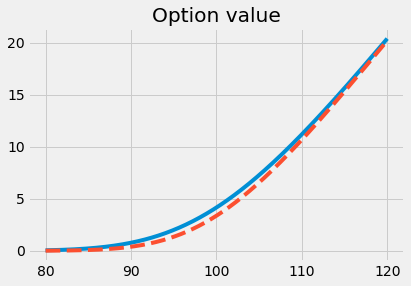

In [85]:

xs = np.linspace(80, 120, 400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
plt.figure()
plt.plot(xs, ys)
plt.title('Option value')

ql.Settings.instance().evaluationDate = ql.Date(7, ql.April, 2014)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
plt.plot(xs, ys, '--')

In [98]:
ql.Settings.instance().evaluationDate = today
u.setValue(100)
print(option.NPV())

4.155543462156206


In [90]:
model = ql.HestonModel(ql.HestonProcess(ql.YieldTermStructureHandle(riskFreeCurve), 
                                       ql.YieldTermStructureHandle(ql.FlatForward(0, ql.UnitedStates(),
                                                                                 0, ql.Actual360())),
                                       ql.QuoteHandle(u),
                                       0.04, 0.1, 0.01, 0.05, -0.75))

In [94]:
engine = ql.AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [95]:
print(option.NPV())

In [100]:
engine = ql.MCEuropeanEngine(process, 'PseudoRandom',
                            timeSteps=20,
                            requiredSamples=250000)
option.setPricingEngine(engine)

In [103]:
u.setValue(104)
%time print(option.NPV())

6.595605700750571
Wall time: 5.2 s
